Задача, есть значения параметра, нужно промаркировать неахарактерно высокие и низкие значения 

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2, style="whitegrid", rc={'figure.figsize' : (15,7)})
import matplotlib.pyplot as plt
from scipy import special
plt.style.use('dark_background')

Формируем произвольный набор данных

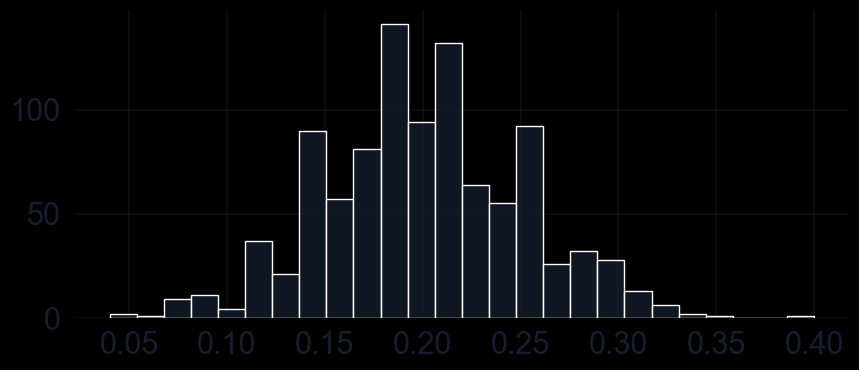

In [86]:
a = [i for i in range(1,1001)]
b = np.random.normal(20, 5, 1000)/100
df = pd.DataFrame({'id': a, 'val': b })
df.val = df.val.round(2)

plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#171e2f')
sns.histplot(df.val, color='#171e2f')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Определяем квантили, определяющие зоны экстремальных значений, например, 0.02 и 0.98

In [87]:
quantiles = df.val.quantile(q=[0.02,0.98])
quantiles

0.02    0.09
0.98    0.31
Name: val, dtype: float64

Пишем функцию, проставлющую признак в зависимости от значения

In [88]:
def r (value):
    if value < quantiles[0.02]:
        return 'low'
    elif value > quantiles[0.98]:
        return 'high'
    else:
        return ''

Применяем функцию к данным

In [89]:
df['score']= df.val.apply(lambda x: r(x))

In [90]:
df[df.score == 'high'].sort_values('val', ascending = False)

,id,val,score
956,957,0.40,high
650,651,0.35,high
282,283,0.34,high
58,59,0.34,high
9,10,0.32,high
320,321,0.32,high
431,432,0.32,high
391,392,0.32,high
443,444,0.32,high
780,781,0.32,high


In [91]:
df[df.score == 'low'].sort_values('val', ascending = True)

,id,val,score
317,318,0.04,low
984,985,0.05,low
791,792,0.06,low
35,36,0.07,low
737,738,0.07,low
989,990,0.07,low
232,233,0.07,low
413,414,0.07,low
511,512,0.08,low
361,362,0.08,low
